## Prova 2

***

### Questão 1 (Sistemas Lineares e Decomposição LU) [4,0 pontos]

Considere os sistemas lineares $\mathrm{A}_i \mathbf{x}_i = \mathbf{b}_i$ para $i = 1,2,3$ com 

$$
\mathrm{A}_1 =
\begin{bmatrix}
15 & 6 & 8 & 11 \\
6 & 6 & 5 & 3 \\
8 & 5 & 7 & 6 \\
11 & 3 & 6 & 9
\end{bmatrix}, \quad \mathrm{A}_i = (\mathrm{A}_1)^i, \quad i=2,3,
$$

e $\mathbf{b}_i$ tal que a solução é sempre $\mathbf{x}_i = [1,1,1,1]^T$. Resolva os três sistemas lineares usando a fatoração LU **com pivoteamento parcial**, e comente sobre os resultados obtidos.  


<div class="alert alert-block alert-info">
<b>Read the docs:</b> <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html">scipy.linalg.lu</a>
    
A decomposição LU com pivoteamento parcial é implementada na biblioteca scipy, veja no link a documentação.
</div>

***

### Questão 2 (Sistemas Lineares e Métodos Iterativos) [3,0 pontos]

Análise as propriedades de convergência dos métodos de Jacobi e Gauss-Seidel para a solução do sistema linear cuja matriz é

$$
\mathrm{A} =
\begin{bmatrix}
\alpha & 0 & 1 \\
0 & \alpha & 0 \\
1 & 0 & \alpha
\end{bmatrix}, \quad \alpha \in \mathbb{R}.
$$

Lembre-se que a convergência desses métodos dependem do *raio espectral* da matriz de iteração $\mathrm{B}$ do método ser menor do que $1$. Para Jacobi, $B = D^{-1}(D-A)$, e para Gauss-Seidel, $B = (D-E)^{-1}(D-E-A)$. Lembrando também que o *raio espectral* é definido por $\rho(B) = \max \{|\lambda|\}$, onde $\lambda$ é autovalor de $B$.

***

### Questão 3 (Interpolação Polinomial) [3,0 pontos]

Considere os pontos $(x_1,y_1) = (0,0)$, $(x_2,y_2) = (1,2)$, $(x_3,y_3) = (2,2)$ e $(x_4,y_4) = (3,6)$.

(a) Ache e plot a forma de Lagrange da interpolação polinomial;

(b) Ache e plot a forma modificada da interpolação polinomial;

(c) Ache e plot a função de interpolação linear por parte.

In [103]:
#1

import numpy as np

from scipy.linalg import lu, solve

A1 = np.array([[15, 6, 8, 11],
               [6, 6, 5, 3],
               [8, 5, 7, 6],
               [11, 3, 6, 9]])

p1, l1, u1 = lu(A1)
print('P =', p1)
print('L =', l1) 
print('U =', u1)

## PAx = L(Ux) = b

x = np.array([[1],[1],[1],[1]])
print('x =', x)

b1 = np.dot(A1,x)
print('b =', b1)

## Ly = b
y1 = solve(l1, b1)
## Ux = y
print('x =', solve(u1,y1))

P = [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
L = [[ 1.          0.          0.          0.        ]
 [ 0.4         1.          0.          0.        ]
 [ 0.53333333  0.5         1.          0.        ]
 [ 0.73333333 -0.38888889  0.45454545  1.        ]]
U = [[ 1.50000000e+01  6.00000000e+00  8.00000000e+00  1.10000000e+01]
 [ 0.00000000e+00  3.60000000e+00  1.80000000e+00 -1.40000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.83333333e+00  8.33333333e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.01010101e-02]]
x = [[1]
 [1]
 [1]
 [1]]
b = [[40]
 [20]
 [26]
 [29]]
x = [[1.]
 [1.]
 [1.]
 [1.]]


In [104]:
A2 = np.dot(A1,A1)
p2, l2, u2 = lu(A2)
print('A2=', A2)
print('P =', p2)
print('L =', l2) 
print('U =', u2)

b2 = np.dot(A2,x.reshape(-1,1))
print('b =', b2)

y2 = solve(l2, b2)
print('x =', solve(u2,y2))

A2= [[446 199 272 330]
 [199 106 131 141]
 [272 131 174 199]
 [330 141 199 247]]
P = [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
L = [[ 1.          0.          0.          0.        ]
 [ 0.44618834  1.          0.          0.        ]
 [ 0.60986547  0.56        1.          0.        ]
 [ 0.73991031 -0.36273616  0.45588235  1.        ]]
U = [[ 4.46000000e+02  1.99000000e+02  2.72000000e+02  3.30000000e+02]
 [ 0.00000000e+00  1.72085202e+01  9.63677130e+00 -6.24215247e+00]
 [ 0.00000000e+00  0.00000000e+00  2.72000000e+00  1.24000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  4.79018969e-05]]
b = [[1247]
 [ 577]
 [ 776]
 [ 917]]
x = [[1.]
 [1.]
 [1.]
 [1.]]


In [105]:
A3 = np.dot(A2,A1)
p3, l3, u3 = lu(A3)
print('A3=', A3)
print('P =', p3)
print('L =', l3) 
print('U =', u3)

b3 = np.dot(A3,x.reshape(-1,1))
print('b =', b3)

y3 = solve(l3, b3)
print('x =', solve(u3,y3))

A3= [[13690  6220  8447 10105]
 [ 6220  2908  3885  4562]
 [ 8447  3885  5243  6220]
 [10105  4562  6220  7470]]
P = [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
L = [[ 1.          0.          0.          0.        ]
 [ 0.45434624  1.          0.          0.        ]
 [ 0.61701972  0.5750811   1.          0.        ]
 [ 0.73813002 -0.35586212  0.45588677  1.        ]]
U = [[ 1.36900000e+04  6.22000000e+03  8.44700000e+03  1.01050000e+04]
 [ 0.00000000e+00  8.19663988e+01  4.71373265e+01 -2.91687363e+01]
 [ 0.00000000e+00  0.00000000e+00  3.92661926e+00  1.79009375e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.26957035e-07]]
b = [[38462]
 [17575]
 [23795]
 [28357]]
x = [[0.99999603]
 [1.00000333]
 [0.99999755]
 [1.00000538]]


O vetor x é impresso com erros numéricos após a operação em A3, pela maior complexidade do algoritmo (três operações de produto de matrizes e a decomposição LU (todas de ordem O(n^3)))

questão 2

em a=-1 não é invertível
em a=0 não é invertível
em a=1 não é invertível


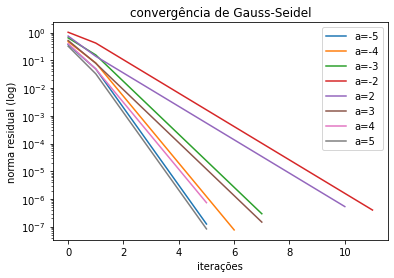

In [114]:
import numpy as np
import matplotlib.pyplot as plt

def Gauss_Seidel(A, b):
    m = A.shape[0]
    n = A.shape[1]

    x = np.zeros(m)
    x_n = np.zeros(m)
    iterations = 0
    residuals = []

    while True:
        for i in range(0, m):
            if A[i, i] == 0:
                print('error')
                return
            x_n[i] = b[i] / A[i, i]
            s = 0
            for j in range(0, m):
                if j < i:
                    s += A[i, j] * x_n[j]
                if j > i:
                    s += A[i, j] * x[j]
            x_n[i] -= s / A[i, i]

        residual = np.linalg.norm(x - x_n, 2)
        residuals.append(residual)
        if residual < 1e-6:
            break

        x[:] = x_n
        iterations += 1

    return residuals

an = np.arange(-5, 6)

for a in an:
    A = np.array([[a, 0, 1], [0, a, 0], [1, 0, a]])
    
    if np.linalg.matrix_rank(A) != A.shape[0]:
        print(f"em a={a} não é invertível")
        continue

    D = np.diag(np.diag(A))
    B = np.linalg.inv(D) @ (D - A)
    b = np.ones(3)
    residuals = Gauss_Seidel(A, b)
    plt.semilogy(residuals, label=f'a={a}')

plt.title('convergência de Gauss-Seidel')
plt.xlabel('iterações')
plt.ylabel('norma residual (log)')
plt.legend()
plt.show()

Gauss-Seidel converge em um raio de |a| > 1

em a=-1 não é invertível
em a=0 não é invertível
em a=1 não é invertível


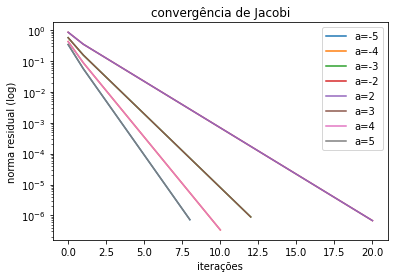

In [115]:
import numpy as np
import matplotlib.pyplot as plt

def Jacobi(A, b):
    m = A.shape[0]
    n = A.shape[1]

    x = np.zeros(m)
    x_n = np.zeros(m)
    iterations = 0
    residuals = []

    while True:
        for i in range(0, m):
            if A[i, i] == 0:
                print('error')
                return
            x_n[i] = b[i] / A[i, i]
            s = 0
            for j in range(0, m):
                if j != i:
                    s += A[i, j] * x[j]
            x_n[i] -= s / A[i, i]

        residual = np.linalg.norm(x - x_n, 2)
        residuals.append(residual)
        if residual < 1e-6:
            break

        x[:] = x_n
        iterations += 1

    return residuals

an = np.arange(-5, 6)
for a in an:
    A = np.array([[a, 0, 1], [0, a, 0], [1, 0, a]])
    
    if np.linalg.matrix_rank(A) != A.shape[0]:
        print(f"em a={a} não é invertível")
        continue

    D = np.diag(np.diag(A))
    B = np.linalg.inv(D) @ (D - A)
    b = np.ones(3)
    residuals = Jacobi(A, b)
    plt.semilogy(residuals, label=f'a={a}')

plt.title('convergência de Jacobi')
plt.xlabel('iterações')
plt.ylabel('norma residual (log)')
plt.legend()
plt.show()

converge para a>1, com um número maior de iterações (Gauss-Seidel é numericamente mais rápido por usar os valores encontrados a cada etapa no próprio sistema para continuar as iterações)

In [108]:
#3, a
import numpy as np
from scipy.interpolate import lagrange

x = np.array([0,1,2,3])
y = np.array([0,2,2,6])
poly = lagrange(x,y)

from numpy.polynomial.polynomial import Polynomial
Polynomial(poly.coef[::-1]).coef

array([ 0.,  5., -4.,  1.])

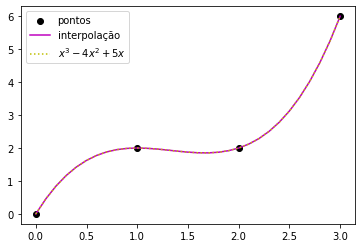

In [2]:
import matplotlib.pyplot as plt
x_new = np.arange(0, 3.1, 0.1)
plt.scatter(x, y, label='pontos', color='k')

plt.plot(x_new, Polynomial(poly.coef[::-1])(x_new), label='interpolação', color='m')
plt.plot(x_new, x_new**3 - 4*x_new**2 + 5*x_new, label=r"$x^3-4x^2+5x$", color='y', linestyle='dotted')

plt.legend()
plt.show()m

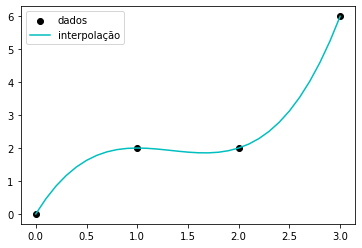

In [102]:
#b - lagrange modificada

import numpy as np
import matplotlib.pyplot as plt

def modlagrange(xp, x, y):
    yp = 0
    for i in range(len(x)):
        n = y[i]
        for j in range(len(x)):
            if i!= j:
                n *= (xp - x[j])/((x[i]-x[j]))
        yp += n
    return yp

x = [0,1,2,3]
y = [0,2,2,6]

t=np.arange(0, 3.1, 0.1)
yt_mod = [modlagrange(i,x,y) for i in t]

plt.scatter(x,y,color='k', label="dados")
plt.plot(t, yt_mod, color='c', label="interpolação")
plt.legend()
plt.show()

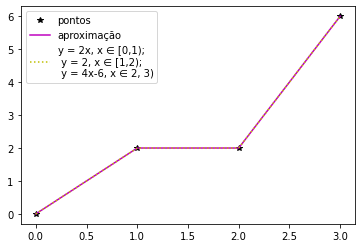

In [12]:
#c, linear por partes

xn = np.array([0,1,2,3])
yn = np.array([0,2,2,6])

##pela tangente. y - y0 = ((y1 - y0)/(x1 - x0)) * (x - x0)
def partes(x):
    if 0 <= x < 1:
        return 2 * x
    elif 1 <= x < 2:
        return 2
    else:
        return 4 * x - 6
    
yp = [partes(x) for x in xn]

plt.plot(xn, yn, '*', color='k', label='pontos')
plt.plot(xn, yn, color='m', label='aproximação')
plt.plot(xn, yp, color='y', linestyle='dotted', label='y = 2x, x ∈ [0,1); \n y = 2, x ∈ [1,2); \n y = 4x-6, x ∈ 2, 3)')
plt.legend()
plt.show()